Since $$I = \int_{0}^{1} \frac{1}{1 + x^2} \,dx$$ is something that looks like a bell-curve (Check in desmos.com/calculator), the function gives more value when we tend to go towards 0 and less when we move towards 1.  

Therfore, question comes : why are we uniformly sampling from everywhere when the value towards 0 carries more weight/value to the function? Hilariously, it will be like trying to study every page of a textbook equally, even though only some pages are important for the exam. In plain Monte Carlo, we sample all x's equally likely - so we might waste a lot of samples on places where $f(x)$ is small. That increases variance.  

That is what importance sampling tends to change - by instead of sampling from the **uniform distribution**, we instead sample from a different probability distribution, with density $g(x)$, and we get this :  

$$
I \approx \sum_{i=1}^{n} \frac{g(x_i)}{f(x_i)}
$$

This will work as long as:  
1. $f(x)$ is still defined over $[0,1]$
2. $g(x) > 0$ wherever $f(x)$ is non-zero

Basically, a function that is easy to sample from, it should look approximately like $f(x)$ in shape, and never be 0 where $f(x)$ is not.  

Let's try a triangular function: $g(x) = 2(1 - x)$ over $[0,1]$

In [12]:
import random
def integral_function(n, a, b):
    total_sum = 0.0
    for _ in range(n):
        x = random.uniform(a, b)
        total_sum += 1 / (1 + x**2)
    return (b - a) * total_sum / n

print(integral_function(10000, 0, 5))

# Works fine but we can reduce the sample size by sampling from some other distribution

1.391609832368241


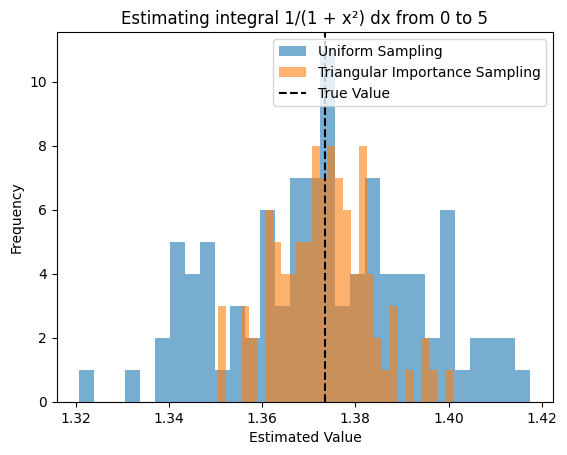

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1 / (1 + x**2)

true_value = np.arctan(5) # for reference

n_trials = 5000
estimates_uniform = []
estimates_triangular = []

for _ in range(100):
    # Uniform Sampling
    x_u = np.random.uniform(0, 5, n_trials)
    fx_u = f(x_u)
    estimate_u = 5 * np.mean(fx_u)
    estimates_uniform.append(estimate_u)

    # Triangular sampling
    x_t = np.random.triangular(left=0, mode=0, right=5, size=n_trials)
    fx_t = f(x_t)
    q_t = 2 * (5 - x_t) / 25 # PDF of triangular 
    weights = fx_t / q_t
    estimate_t = np.mean(weights)
    estimates_triangular.append(estimate_t)

# Plotting
plt.hist(estimates_uniform, bins=30, alpha=0.6, label='Uniform Sampling')
plt.hist(estimates_triangular, bins=30, alpha=0.6, label='Triangular Importance Sampling')
plt.axvline(true_value, color='black', linestyle='--', label='True Value')
plt.legend()
plt.title("Estimating integral 1/(1 + x²) dx from 0 to 5")
plt.xlabel("Estimated Value")
plt.ylabel("Frequency")
plt.show()
    

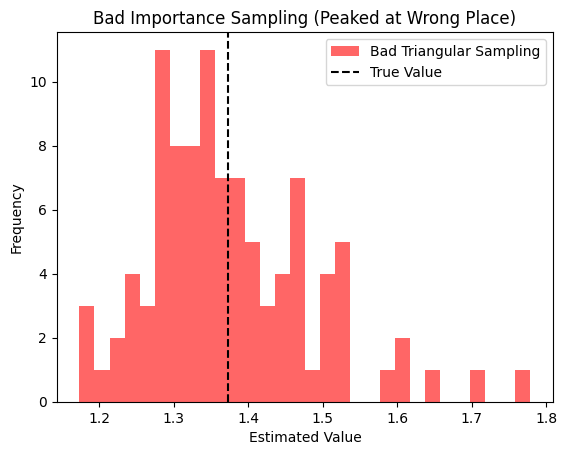

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1 / (1 + x**2)

true_value = np.arctan(5)

n_trials = 5000
bad_estimates = []

for _ in range(100):
    x_bad = np.random.triangular(left=0, mode=5, right=5, size=n_trials)  # Peak at x=5
    fx = f(x_bad)
    q = 2 * (x_bad - 0) / 25  # PDF of triangular(0,5,5)
    weights = fx / q
    estimate = np.mean(weights)
    bad_estimates.append(estimate)

plt.hist(bad_estimates, bins=30, alpha=0.6, color='red', label='Bad Triangular Sampling')
plt.axvline(true_value, color='black', linestyle='--', label='True Value')
plt.legend()
plt.title("Bad Importance Sampling (Peaked at Wrong Place)")
plt.xlabel("Estimated Value")
plt.ylabel("Frequency")
plt.show()
